# Transfer learning with VGG-16

VGG-16[2] as a feature extractor.

<img src="vgg16.png">

## References

- [1] "Hands-On Transfer Learning with Python - Implement Advanced Deep Learning and Neural Network Models Using Tensorflow and Keras" 
- [2] "Very Deep Convolutional Networks for Large-Scale Image Recognition", Karen Simonyan and Andrew Zisserman (2014)

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

## Dataset preparation

In [3]:
def build_dataset(dataset_path,training_path_prefix,test_path_prefix,target_size,batch_size):   
    train_datagen = ImageDataGenerator(
        rescale=1./255, 
        zoom_range=0.3, 
        rotation_range=90,
        width_shift_range=0.05, 
        height_shift_range=0.05, 
        shear_range=0.2, 
        horizontal_flip=True, 
        vertical_flip=True, 
        channel_shift_range=50.0,
        fill_mode='nearest'
    )
    test_datagen = ImageDataGenerator(rescale=1./255)

    training_set_generator = train_datagen.flow_from_directory(
            dataset_path+training_path_prefix,
            (INPUT_IMG_DIM,INPUT_IMG_DIM),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=True,
            seed=42
        )
    test_set_generator = test_datagen.flow_from_directory(
        dataset_path+test_path_prefix,
        (INPUT_IMG_DIM,INPUT_IMG_DIM),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        shuffle=True,
        seed=42
    )    
    return training_set_generator, test_set_generator

In [ ]:
INPUT_IMG_DIM = 120
BATCH_SIZE = 32
DATASET_PATH="../my_datasets/cracks_splitted8020/"
TRAINING_PATH_PREFIX="train_set"
TEST_PATH_PREFIX="test_set"

In [ ]:
training_set_generator, test_set_generator = build_dataset(
    DATASET_PATH,
    TRAINING_PATH_PREFIX,
    TEST_PATH_PREFIX,
    (INPUT_IMG_DIM,INPUT_IMG_DIM),
    BATCH_SIZE
)

## VGG-16

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras


# Base VGG
vgg = vgg16.VGG16(
    include_top=False, 
    weights='imagenet', 
    input_shape=(INPUT_IMG_DIM, INPUT_IMG_DIM, 3)
)

# Flatten output layer
output = vgg.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

Explore model

In [8]:
for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 120, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 120, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 30, 128)       0         
__________

In [9]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f3f90e0f400>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ee873e630>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3f98f5f320>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ee873ef98>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ee87470f0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ee43c2cc0>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f3ee42a6400>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ee42a6518>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ee44f97f0>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f3ee44706a0>,block3_conv3,False


In [10]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


(1, 3, 3, 512)


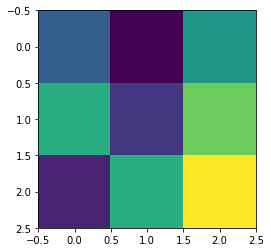

In [11]:
imgs,labels = training_set_generator.next()
bottleneck_feature_example = vgg.predict(imgs[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

## Top layer

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import optimizers 

model = Sequential() 
model.add(vgg_model) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5), 
              metrics=['accuracy'])

## Training

In [ ]:
def train_vgg( model,
               target_size,
               dataset_path,
               training_path_prefix,
               test_path_prefix,                        
               history_file_path,
               history_filename,
               checkpoint_path,
               checkpoint_prefix,
               number_of_epochs,
               tensorboard_log_path
            ):
   
    step_size_train=training_set_generator.n//training_set_generator.batch_size
    step_size_validation=test_set_generator.n//test_set_generator.batch_size

    check_pointer = ModelCheckpoint(
            checkpoint_path + '%s_weights.{epoch:02d}-{val_loss:.2f}.hdf5' % checkpoint_prefix, 
            monitor='val_loss', 
            mode='auto', 
            save_best_only=True
    )
    
    tensorboard_logger = TensorBoard( 
        log_dir=tensorboard_log_path, histogram_freq=0,  
          write_graph=True, write_images=True
    )
    tensorboard_logger.set_model(model)

    csv_logger = CSVLogger(filename=history_file_path+history_filename)
    history = model.fit_generator(
            training_set_generator,
            steps_per_epoch=step_size_train,
            epochs=number_of_epochs,
            validation_data=test_set_generator,
            validation_steps=step_size_validation,
            callbacks=[check_pointer, csv_logger,tensorboard_logger],
            verbose=True        
    )

In [2]:
#TODO train